# Finding Median

In [1]:
%run RunningTimeExperiment.py

In [2]:
# initialize random
rand = Random(12345)

# figure settings
INTERACTIVE_CHARTS = False
ns = [50000, 100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000]

# demo
# INTERACTIVE_CHARTS = True
# ns = [50000, 100000, 200000, 500000, 1000000]

## Algorithm Implementations

In [3]:
def find_median_by_sorting(xs: List[int]) -> int:
    return sorted(xs)[(len(xs) - 1) // 2]

In [4]:
from more_itertools import partition

def find_almost_median_by_random(xs: List[int]) -> int:
    n = len(xs)
    thres = n // 4
    
    while True:
        pivot = rand.choice(xs)

        # verify
        cnt = sum(1 if x <= pivot else 0 for x in xs)
        if cnt >= thres and n - cnt >= thres:
            return pivot

def select_by_random(xs: List[int], k: int) -> int:
    """This is not an in-place algorithm."""

    n = len(xs)
    if n == 1:
        return xs[0]

    pivot = find_almost_median_by_random(xs)
    left, right = partition(lambda x: x > pivot, xs)
    left = list(left)
    right = list(right)

    if k < len(left):
        return select_by_random(left, k)
    else:
        return select_by_random(right, k - len(left))

def find_median_by_random(xs: List[int]) -> int:
    return select_by_random(xs, (len(xs) - 1) // 2)

In [5]:
def find_almost_median_by_median_of_medians(xs: List[int]) -> int:
    n = len(xs)
    zs = []
    
    for i in range(0, n, 5):
        # pick 5 elements
        ys = xs[i: i + 5]

        # find the median of those
        z = sorted(ys)[(len(ys) - 1) // 2]
        zs += [z]
    
    return find_median_by_median_of_medians(zs)

def select_by_median_of_medians(xs: List[int], k: int) -> int:
    """This is not an in-place algorithm."""

    n = len(xs)
    if n == 1:
        return xs[0]

    pivot = find_almost_median_by_median_of_medians(xs)
    left, right = partition(lambda x: x > pivot, xs)
    left = list(left)
    right = list(right)

    if k < len(left):
        return select_by_median_of_medians(left, k)
    else:
        return select_by_median_of_medians(right, k - len(left))

def find_median_by_median_of_medians(xs: List[int]) -> int:
    return select_by_median_of_medians(xs, (len(xs) - 1) // 2)

### Testing

In [6]:
assert find_median_by_median_of_medians(list(range(10))) == 4
assert find_median_by_median_of_medians(list(range(11))) == 5

## Experiments

In [7]:
rte = RunningTimeExperiment()

# generate instances
for n in ns:
    print(f'Creating a problem instance: n={n}')
    xs = rand.sample(range(0, 1000000000), n)
    rte.add_instance(n, xs)

# register algorithms
rte.add_algorithm('sort', find_median_by_sorting)
rte.add_algorithm('rand', find_median_by_random)
rte.add_algorithm('mofm', find_median_by_median_of_medians)

Creating a problem instance: n=50000
Creating a problem instance: n=100000
Creating a problem instance: n=200000
Creating a problem instance: n=500000
Creating a problem instance: n=1000000
Creating a problem instance: n=2000000
Creating a problem instance: n=5000000
Creating a problem instance: n=10000000


In [8]:
rte.validate()
rte.run()

Validating algorithms...ok
Running measurment (algorithm=sort): |n=50000:...|n=100000:...|n=200000:...|n=500000:...|n=1000000:...|n=2000000:...|n=5000000:...|n=10000000:...|
Running measurment (algorithm=rand): |n=50000:...|n=100000:...|n=200000:...|n=500000:...|n=1000000:...|n=2000000:...|n=5000000:...|n=10000000:...|
Running measurment (algorithm=mofm): |n=50000:...|n=100000:...|n=200000:...|n=500000:...|n=1000000:...|n=2000000:...|n=5000000:...|n=10000000:...|


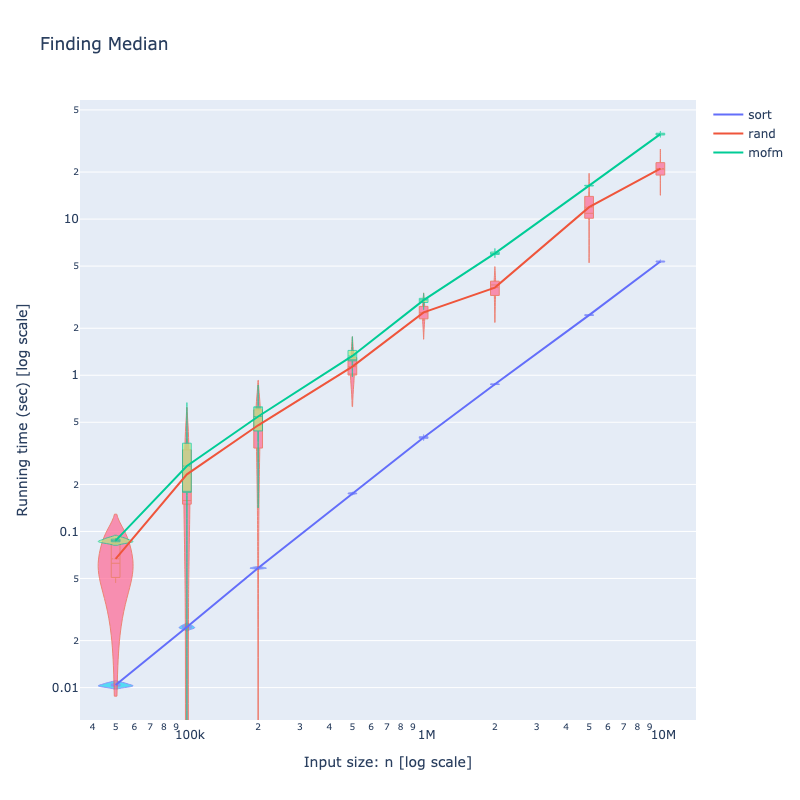

In [9]:
show_figure(rte.create_figure('Finding Median'), None if INTERACTIVE_CHARTS else 'img/04_3_Median.png')